# [CDAF] Atividade 1

## Nome e matrícula
Nome: Júlio Guerra Domingues
Matrícula: 2022431280

## Introdução
Nesta atividade, vamos revisar os conceitos aprendidos em sala de aula sobre aleatoriedade e previsão a partir dos dados de
súmula.


Para isso utilizaremos o dataset "Soccer Prediction Challenge", disponível no Moodle.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Questão 1
- Carregue o dataset 'TrainingSet_2023_02_08'
- Crie 4 histogramas:
    a) um para a quantidade de gols marcados por jogo pelos times mandantes
    b) um para a quantidade de gols marcados por jogo pelos time visitantes
    c) um para a quantidade total de gols em cada partida
    d) um para a diferença de gols por partida
- Caso hajam jogos com erros claros de anotação, destaque-os e remova-os antes de gerar os histogramas.
- Calcule o mínimo, o máximo e a média dos valores representados em cada um dos 4 histogramas.

In [6]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from scipy.stats import poisson,skellam

df = pd.read_excel('/content/drive/MyDrive/CC/2025-1/CDAF/Atividade 1 - Dados de Súmula/TrainingSet_2023_02_08.xlsx')

DataFrame.hist(column=None, by=None, grid=True, xlabelsize=None, xrot=None, ylabelsize=None, yrot=None, ax=None, sharex=False, sharey=False, figsize=None, layout=None, bins=10, backend=None, legend=False, **kwargs)[source]


In [7]:
df.head()

,Sea,Lge,Date,HT,AT,HS,AS,GD,WDL
0,00-01,GER1,11/08/2000,Dortmund,Hansa Rostock,1,0,1,W
1,00-01,GER1,12/08/2000,Bayern Munich,Hertha Berlin,4,1,3,W
2,00-01,GER1,12/08/2000,Freiburg,VfB Stuttgart,4,0,4,W
3,00-01,GER1,12/08/2000,Hamburger SV,Munich 1860,2,2,0,D
4,00-01,GER1,12/08/2000,Kaiserslautern,Bochum,0,1,-1,L


array([[<Axes: title={'center': 'HS'}>]], dtype=object)

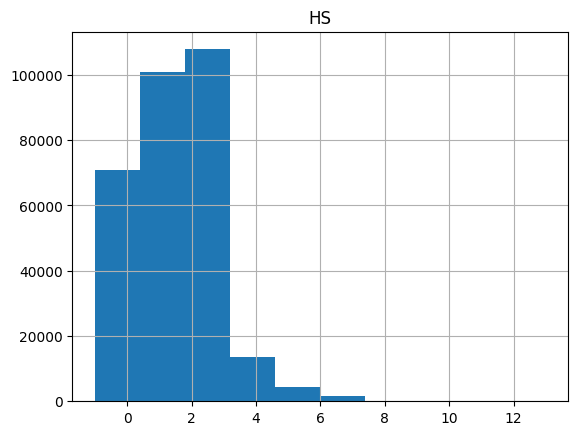

In [8]:
# quantidade de gols marcados por jogo pelos times mandantes
df.hist(column="HS")

array([[<Axes: title={'center': 'AS'}>]], dtype=object)

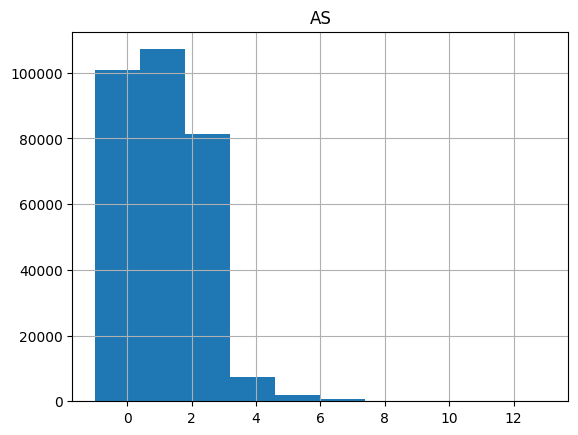

In [9]:
# quantidade de gols marcados por jogo pelos time visitantes
df.hist(column="AS")

array([[<Axes: title={'center': 'TotalGoals'}>]], dtype=object)

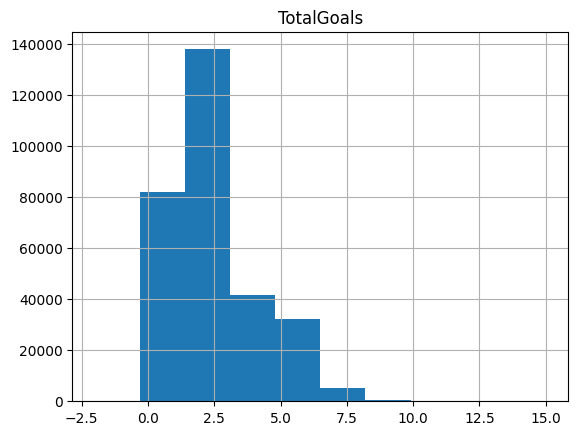

In [12]:
# quantidade total de gols em cada partida
df['TotalGoals'] = df['HS'] + df['AS']
df.hist(column='TotalGoals')

# df[['HS', 'AS']].sum(axis=1).hist()

array([[<Axes: title={'center': 'GD'}>]], dtype=object)

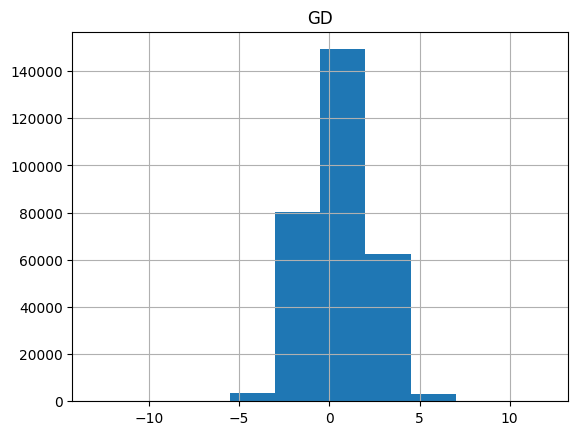

In [10]:
# diferença de gols por partida
df.hist(column="GD")

## Questão 2
- Escolha uma temporada já finalizada de alguma das ligas presentes no dataset.
- Repita os 4 histogramas da questão 1 utilizando apenas dados do campeonato selecionado.
- Quais as diferenças entre os histogramas da questão 1 e da questão 2? O que isso pode indicar sobre as características da liga escolhida quando comparada ao todo?

In [17]:
df['Lge'].unique()

array(['GER1', 'ENG1', 'ENG2', 'ENG3', 'ENG4', 'ITA1', 'ITA2', 'HOL1',
       'SCO1', 'SCO2', 'SCO3', 'SCO4', 'SPA1', 'SPA2', 'FRA1', 'FRA2',
       'BEL1', 'GRE1', 'POR1', 'ARG1', 'RUS1', 'CHN1', 'AUS1', 'CHE1',
       'SWE1', 'AUT1', 'DNK1', 'GER2', 'MEX1', 'ISR1', 'FIN1', 'BRA1',
       'JPN1', 'KOR1', 'ZAF1', 'CHL1', 'ENG5', 'NZL1', 'DZA1', 'MAR1',
       'TUN1', 'ECU1', 'VEN1', 'GER3', 'NOR1', 'USA1', 'FRA3', 'RUS2',
       'USA2', 'BRA2', 'JPN2'], dtype=object)

In [19]:
df['Sea'].unique()

array(['00-01', '01-02', '02-03', '03-04', '04-05', '05-06', '06-07',
       '07-08', '08-09', '09-10', '10-11', '11-12', '12-13', '13-14',
       '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21',
       '21-22', '22-23', '23-24'], dtype=object)

<ipython-input-18-1abcf64e709f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pl1516['TotalGoals'] = df_pl1516['HS'] + df_pl1516['AS']


array([[<Axes: title={'center': 'GD'}>]], dtype=object)

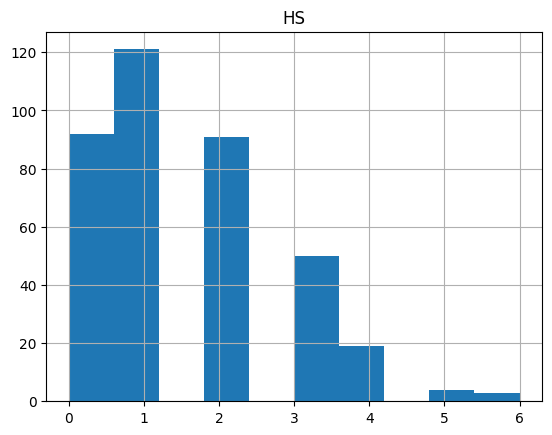

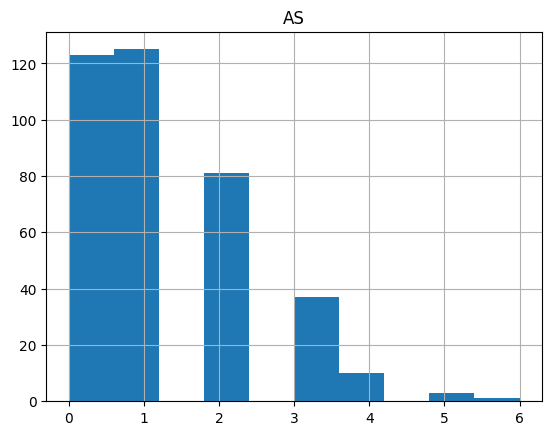

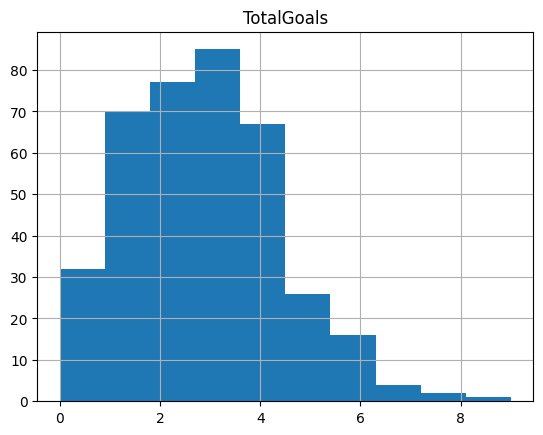

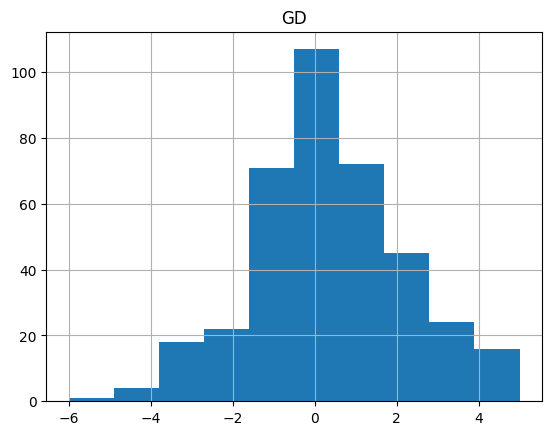

In [18]:
# temporada escolhida: 15-16
# liga escolhida: Premier League

df_pl1516 = df[(df['Sea'] == '15-16') & (df['Lge'] == 'ENG1')]

In [34]:
# quantidade de gols marcados por jogo pelos times mandantes
df.hist(column="HS", bins=10)
df_pl1516.hist(column="HS", bins=10)

ValueError: hist method requires numerical or datetime columns, nothing to plot.

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Criar faixas para discretização (intervalos de 1 em 1 gol)
bins = range(0, df['HS'].max() + 2, 1)  # +2 para incluir o último valor corretamente

# Discretizar e contar a frequência de cada intervalo
df['HS_binned'] = pd.cut(df['HS'], bins=bins, right=False)

# Plotar o histograma
df['HS_binned'].value_counts().sort_index().plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel("Número de Gols (Discretizado)")
plt.ylabel("Frequência")
plt.title("Histograma Discretizado de Gols em Casa (HS)")
plt.show()

TypeError: 'pandas._libs.interval.Interval' object cannot be interpreted as an integer

In [ ]:
aimport matplotlib.pyplot as plt

# Criar faixas para discretização (por exemplo, intervalos de 1 em 1 gols)
bins = 10
# Discretizar e contar a frequência de cada intervalo
df['HS'] = pd.cut(df['HS'], bins=bins, right=False)

# Plotar o histograma
df['HS'].value_counts().sort_index().plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel("Faixas de Total de Gols Casa")
plt.ylabel("Frequência")
plt.title("Histograma Discretizado de Total de Gols Casa")
plt.show()

In [ ]:

# Discretizar e contar a frequência de cada intervalo
df_pl1516['HS'] = pd.cut(df_pl1516['HS'], bins=bins, right=False)

# Plotar o histograma
df['HS'].value_counts().sort_index().plot(kind='bar', color='blue', edgecolor='black')

array([[<Axes: title={'center': 'AS'}>]], dtype=object)

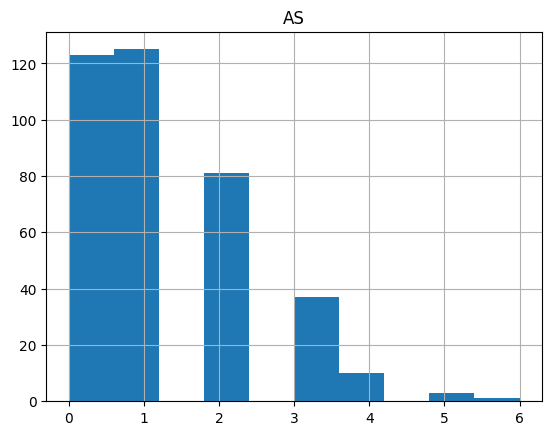

In [21]:
# quantidade de gols marcados por jogo pelos time visitantes
df_pl1516.hist(column="AS")


<ipython-input-22-20ac412ce1c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pl1516['TotalGoals'] = df_pl1516['HS'] + df_pl1516['AS']


array([[<Axes: title={'center': 'TotalGoals'}>]], dtype=object)

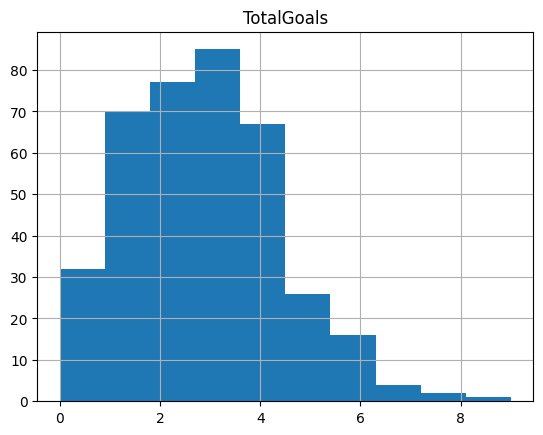

In [22]:
# quantidade total de gols em cada partida
df_pl1516['TotalGoals'] = df_pl1516['HS'] + df_pl1516['AS']
df_pl1516.hist(column='TotalGoals')

array([[<Axes: title={'center': 'GD'}>]], dtype=object)

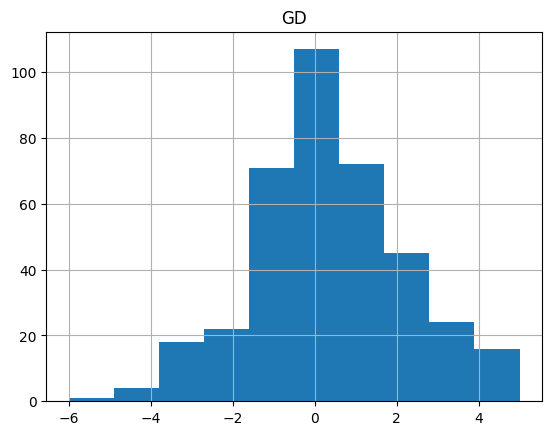

In [23]:
# diferença de gols por partida
df_pl1516.hist(column="GD")

Quais as diferenças entre os histogramas da questão 1 e da questão 2? O que isso pode indicar sobre as características da liga escolhida quando comparada ao todo?


Nota-se menor número de gols dos times da casa e menores diferenças no placar na Premier League de 15/16 em relação aos demais campeonatos.

## Questão 3
- Utilizando apenas dados do campeonato selecionado, crie um dataframe que corresponda à tabela de classificação ao fim da temporada contendo o nome dos times, nº de pontos, jogos, vitórias, empates, derrotas, gols pró, gols contra e saldo de gols. Ordene a classificação por pontos, vitórias, saldo de gols e gols pró.
- Faça o mesmo considerando apenas a primeira metade de jogos.

In [41]:
df_pl1516["Date"] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

df_pl1516.sort_values(by="Date", ascending=True)

<ipython-input-41-bf7eae45b5bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pl1516["Date"] = pd.to_datetime(df['Date'], format='%d/%m/%Y')


,Sea,Lge,Date,HT,AT,HS,AS,GD,WDL,TotalGoals
185305,15-16,ENG1,2015-08-08,Bournemouth,Aston Villa,0,1,-1,L,1
185306,15-16,ENG1,2015-08-08,Chelsea,Swansea City,2,2,0,D,4
185307,15-16,ENG1,2015-08-08,Everton,Watford,2,2,0,D,4
185308,15-16,ENG1,2015-08-08,Leicester City,Sunderland,4,2,2,W,6
185309,15-16,ENG1,2015-08-08,Manchester United,Tottenham Hotspur,1,0,1,W,1
...,...,...,...,...,...,...,...,...,...,...
185677,15-16,ENG1,2016-05-15,Everton,Norwich City,3,0,3,W,3
185676,15-16,ENG1,2016-05-15,Chelsea,Leicester City,1,1,0,D,2
185675,15-16,ENG1,2016-05-15,Arsenal,Aston Villa,4,0,4,W,4
185678,15-16,ENG1,2016-05-15,Newcastle United,Tottenham Hotspur,5,1,4,W,6


In [44]:
# nome dos times, nº de pontos, jogos, vitórias, empates, derrotas, gols pró, gols contra e saldo de gols.
tabela_final = pd.DataFrame(columns=["Team", "PTS", "J", "V", "E", "D", "GP", "GC", "SG"])

In [46]:
tabela_final["Team"] = df_pl1516["HT"].unique()
tabela_final.head()

,Team,PTS,J,V,E,D,GP,GC,SG
0,Bournemouth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Chelsea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Everton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Leicester City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Manchester United,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
data = {"Team": df_pl1516["HT"].unique(),
        "PTS": [0]*20,
        "J": [0]*20,
        "V": [0]*20,
        "E": [0]*20,
        "D": [0]*20,
        "GP": [0]*20,
        "GC": [0]*20,
        "SG": [0]*20}

tabela = pd.DataFrame(data)

In [61]:
tabela.head()

,Team,PTS,J,V,E,D,GP,GC,SG
0,Bournemouth,0,0,0,0,0,0,0,0
1,Chelsea,0,0,0,0,0,0,0,0
2,Everton,0,0,0,0,0,0,0,0
3,Leicester City,0,0,0,0,0,0,0,0
4,Manchester United,0,0,0,0,0,0,0,0


In [63]:
import pandas as pd

# Criando a tabela final
tabela_final = pd.DataFrame(columns=["Team", "PTS", "J", "V", "E", "D", "GP", "GC", "SG"])

# Simulando um dataframe de entrada
df = df_pl1516

# Função para atualizar a tabela final
def atualizar_tabela(tabela, time, pontos, gols_pro, gols_contra, resultado):
    if time not in tabela.index:
        tabela.loc[time] = [time, 0, 0, 0, 0, 0, 0, 0, 0]  # Inicializa o time

    # Atualiza estatísticas
    tabela.at[time, "J"] += 1  # Jogos
    tabela.at[time, "PTS"] += pontos  # Pontos
    tabela.at[time, "GP"] += gols_pro  # Gols Pró
    tabela.at[time, "GC"] += gols_contra  # Gols Contra
    tabela.at[time, "SG"] = tabela.at[time, "GP"] - tabela.at[time, "GC"]  # Saldo de Gols

    if resultado == "V":
        tabela.at[time, "V"] += 1
    elif resultado == "E":
        tabela.at[time, "E"] += 1
    elif resultado == "D":
        tabela.at[time, "D"] += 1

# Processando cada jogo
for _, row in df.iterrows():
    # Times e gols
    time_casa, time_fora = row["HT"], row["AT"]
    gols_casa, gols_fora = row["HS"], row["AS"]

    # Determinar pontos e resultado
    if gols_casa > gols_fora:
        resultado_casa, resultado_fora = "V", "D"
        pontos_casa, pontos_fora = 3, 0
    elif gols_casa < gols_fora:
        resultado_casa, resultado_fora = "D", "V"
        pontos_casa, pontos_fora = 0, 3
    else:
        resultado_casa, resultado_fora = "E", "E"
        pontos_casa, pontos_fora = 1, 1

    # Atualizar tabela para os dois times
    atualizar_tabela(tabela_final, time_casa, pontos_casa, gols_casa, gols_fora, resultado_casa)
    atualizar_tabela(tabela_final, time_fora, pontos_fora, gols_fora, gols_casa, resultado_fora)

# Resetando o índice
tabela_final.reset_index(drop=True, inplace=True)

# Exibir tabela final
print(tabela_final)

                    Team  PTS   J   V   E   D  GP  GC  SG
0            Bournemouth   42  38  11   9  18  45  67 -22
1            Aston Villa   17  38   3   8  27  27  76 -49
2                Chelsea   50  38  12  14  12  59  53   6
3           Swansea City   47  38  12  11  15  42  52 -10
4                Everton   47  38  11  14  13  59  55   4
5                Watford   45  38  12   9  17  40  50 -10
6         Leicester City   81  38  23  12   3  68  36  32
7             Sunderland   39  38   9  12  17  48  62 -14
8      Manchester United   66  38  19   9  10  49  35  14
9      Tottenham Hotspur   70  38  19  13   6  69  35  34
10          Norwich City   34  38   9   7  22  39  67 -28
11        Crystal Palace   42  38  11   9  18  39  51 -12
12               Arsenal   71  38  20  11   7  65  36  29
13       West Ham United   62  38  16  14   8  65  51  14
14      Newcastle United   37  38   9  10  19  44  65 -21
15           Southampton   63  38  18   9  11  59  41  18
16            

In [64]:
# Ordenando a tabela por PTS, depois V, depois SG, depois GP
tabela_final = tabela_final.sort_values(by=["PTS", "V", "SG", "GP"], ascending=[False, False, False, False])

# Resetando o índice para ficar sequencial
tabela_final.reset_index(drop=True, inplace=True)

# Exibir tabela final ordenada
print(tabela_final)

                    Team  PTS   J   V   E   D  GP  GC  SG
0         Leicester City   81  38  23  12   3  68  36  32
1                Arsenal   71  38  20  11   7  65  36  29
2      Tottenham Hotspur   70  38  19  13   6  69  35  34
3        Manchester City   66  38  19   9  10  71  41  30
4      Manchester United   66  38  19   9  10  49  35  14
5            Southampton   63  38  18   9  11  59  41  18
6        West Ham United   62  38  16  14   8  65  51  14
7              Liverpool   60  38  16  12  10  63  50  13
8             Stoke City   51  38  14   9  15  41  55 -14
9                Chelsea   50  38  12  14  12  59  53   6
10          Swansea City   47  38  12  11  15  42  52 -10
11               Everton   47  38  11  14  13  59  55   4
12               Watford   45  38  12   9  17  40  50 -10
13  West Bromwich Albion   43  38  10  13  15  34  48 -14
14        Crystal Palace   42  38  11   9  18  39  51 -12
15           Bournemouth   42  38  11   9  18  45  67 -22
16            

In [98]:
# Faça o mesmo considerando apenas a primeira metade de jogos.
import pandas as pd

df_pl1516 = df_pl1516.rename(columns={'HomeTeam': 'HT', 'AwayTeam': 'AT', 'HomeGoals': 'HS', 'AwayGoals': 'AS'})
# Criando a tabela final
tabela_metade = pd.DataFrame(columns=["Team", "PTS", "J", "V", "E", "D", "GP", "GC", "SG"])

# Simulando um dataframe de entrada
df = df_pl1516.iloc[:190].reset_index(drop=True)

# Função para atualizar a tabela final
def atualizar_tabela(tabela, time, pontos, gols_pro, gols_contra, resultado):
    if time not in tabela.index:
        tabela.loc[time] = [time, 0, 0, 0, 0, 0, 0, 0, 0]  # Inicializa o time

    # Atualiza estatísticas
    tabela.at[time, "J"] += 1  # Jogos
    tabela.at[time, "PTS"] += pontos  # Pontos
    tabela.at[time, "GP"] += gols_pro  # Gols Pró
    tabela.at[time, "GC"] += gols_contra  # Gols Contra
    tabela.at[time, "SG"] = tabela.at[time, "GP"] - tabela.at[time, "GC"]  # Saldo de Gols

    if resultado == "V":
        tabela.at[time, "V"] += 1
    elif resultado == "E":
        tabela.at[time, "E"] += 1
    elif resultado == "D":
        tabela.at[time, "D"] += 1

# Processando cada jogo
for _, row in df.iterrows():
    # Times e gols
    time_casa, time_fora = row["HT"], row["AT"]
    gols_casa, gols_fora = row["HS"], row["AS"]

    # Determinar pontos e resultado
    if gols_casa > gols_fora:
        resultado_casa, resultado_fora = "V", "D"
        pontos_casa, pontos_fora = 3, 0
    elif gols_casa < gols_fora:
        resultado_casa, resultado_fora = "D", "V"
        pontos_casa, pontos_fora = 0, 3
    else:
        resultado_casa, resultado_fora = "E", "E"
        pontos_casa, pontos_fora = 1, 1

    # Atualizar tabela para os dois times
    atualizar_tabela(tabela_metade, time_casa, pontos_casa, gols_casa, gols_fora, resultado_casa)
    atualizar_tabela(tabela_metade, time_fora, pontos_fora, gols_fora, gols_casa, resultado_fora)

# Resetando o índice
tabela_metade.reset_index(drop=True, inplace=True)

# Ordenando a tabela por PTS, depois V, depois SG, depois GP
tabela_metade = tabela_metade.sort_values(by=["PTS", "V", "SG", "GP"], ascending=[False, False, False, False])

# Resetando o índice para ficar sequencial
tabela_metade.reset_index(drop=True, inplace=True)

# Exibir tabela final ordenada
print(tabela_metade)

                    Team  PTS   J   V  E   D  GP  GC  SG
0                Arsenal   39  19  12  3   4  33  18  15
1         Leicester City   39  19  11  6   2  37  25  12
2        Manchester City   36  19  11  3   5  37  20  17
3      Tottenham Hotspur   35  19   9  8   2  33  15  18
4         Crystal Palace   31  19   9  4   6  23  16   7
5      Manchester United   30  19   8  6   5  22  16   6
6              Liverpool   30  19   8  6   5  22  22   0
7                Watford   29  19   8  5   6  24  20   4
8             Stoke City   29  19   8  5   6  20  19   1
9        West Ham United   29  19   7  8   4  28  23   5
10               Everton   26  19   6  8   5  35  28   7
11           Southampton   24  19   6  6   7  26  23   3
12  West Bromwich Albion   23  19   6  5   8  18  24  -6
13               Chelsea   20  19   5  5   9  23  29  -6
14          Norwich City   20  19   5  5   9  22  32 -10
15           Bournemouth   20  19   5  5   9  22  34 -12
16          Swansea City   19  

## Questão 4
- Utilizando os jogos da liga escolhida, use regressão de Poisson para criar um modelo de previsão de resultados, como visto nos slides em sala e no Soccermatics.
-- https://soccermatics.readthedocs.io/en/latest/gallery/lesson5/plot_SimulateMatches.html
- Dê print no sumário do ajuste
- Simule a partida entre o 1º e o 4º colocado, onde o 1º joga em casa. Primeiro, apresente a quantidade esperada de gols de cada time. Em seguida, apresente um grid com as probabilidades associadas a cada placar possível.

In [77]:
df_pl1516 = df_pl1516.rename(columns={'HT': 'HomeTeam', 'AT': 'AwayTeam', 'HS': 'HomeGoals', 'AS': 'AwayGoals'})

In [78]:
df_pl1516.head()

,Sea,Lge,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,GD,WDL,TotalGoals
185305,15-16,ENG1,2015-08-08,Bournemouth,Aston Villa,0,1,-1,L,1
185306,15-16,ENG1,2015-08-08,Chelsea,Swansea City,2,2,0,D,4
185307,15-16,ENG1,2015-08-08,Everton,Watford,2,2,0,D,4
185308,15-16,ENG1,2015-08-08,Leicester City,Sunderland,4,2,2,W,6
185309,15-16,ENG1,2015-08-08,Manchester United,Tottenham Hotspur,1,0,1,W,1


In [79]:
df_pl1516 = df_pl1516[:-10]

In [80]:
goal_model_data = pd.concat([df_pl1516[['HomeTeam','AwayTeam','HomeGoals']].assign(home=1).rename(
            columns={'HomeTeam':'team', 'AwayTeam':'opponent','HomeGoals':'goals'}),
           df_pl1516[['AwayTeam','HomeTeam','AwayGoals']].assign(home=0).rename(
            columns={'AwayTeam':'team', 'HomeTeam':'opponent','AwayGoals':'goals'})])

poisson_model = smf.glm(formula="goals ~ home + team + opponent", data=goal_model_data,
                        family=sm.families.Poisson()).fit()
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                  660
Model:                            GLM   Df Residuals:                      620
Model Family:                 Poisson   Df Model:                           39
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -927.84
Date:                Wed, 19 Mar 2025   Deviance:                       724.18
Time:                        19:22:07   Pearson chi2:                     605.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1574
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            0.2278      0.226      1.007      0.314      -0.216       0.671
team[T.Aston Villa]                 -0.9288      0.249     -3.733      0.000      -1.416      -0.441
team[T.Bournemouth]                 -0.3528      0.209     -1.689      0.091      -0.762       0.056
team[T.Chelsea]                     -0.1661      0.198     -0.841      0.400      -0.553       0.221
team[T.Crystal Palace]              -0.5184      0.217     -2.390      0.017      -0.943      -0.093
team[T.Everton]                     -0.0617      0.193     -0.319      0.750      -0.441       0.317
team[T.Leicester City]              -0.0313      0.190     -0.165      0.869      -0.404       0.341
team[T.Liverpool]                   -0.0557      0.197     -0.283      0.777      -0.441       0.330
team[T.Manchester City]              0.0391      0.187      0.209      0.834      -0.327       0.405
team[T.Manchester United]           -0.3752      0.209     -1.799      0.072      -0.784       0.034
team[T.Newcastle United]            -0.4823      0.217     -2.222      0.026      -0.908      -0.057
team[T.Norwich City]                -0.5290      0.217     -2.441      0.015      -0.954      -0.104
team[T.Southampton]                 -0.2988      0.202     -1.482      0.138      -0.694       0.096
team[T.Stoke City]                  -0.4536      0.213     -2.126      0.033      -0.872      -0.035
team[T.Sunderland]                  -0.3772      0.210     -1.796      0.072      -0.789       0.034
team[T.Swansea City]                -0.5716      0.219     -2.610      0.009      -1.001      -0.142
team[T.Tottenham Hotspur]            0.0165      0.188      0.088      0.930      -0.351       0.384
team[T.Watford]                     -0.5683      0.223     -2.549      0.011      -1.005      -0.131
team[T.West Bromwich Albion]        -0.6377      0.225     -2.832      0.005      -1.079      -0.196
team[T.West Ham United]             -0.1001      0.194     -0.515      0.607      -0.481       0.281
opponent[T.Aston Villa]              0.5956      0.214      2.781      0.005       0.176       1.015
opponent[T.Bournemouth]              0.4901      0.221      2.216      0.027       0.057       0.924
opponent[T.Chelsea]                  0.3201      0.230      1.391      0.164      -0.131       0.771
opponent[T.Crystal Palace]           0.2112      0.233      0.906      0.365      -0.246       0.668
opponent[T.Everton]                  0.2909      0.231      1.258      0.208      -0.162       0.744
opponent[T.Leicester City]          -0.0622      0.251     -0.248      0.804      -0.554       0.430
opponent[T.Liverpool]                0.2732      0.234      1.169      0.242      -0.185       0.731
opponent[T.Manchester City]         -0.0058      0.24

In [83]:
# Simule a partida entre o 1º e o 4º colocado, onde o 1º joga em casa.
# Primeiro, apresente a quantidade esperada de gols de cada time.
# Em seguida, apresente um grid com as probabilidades associadas a cada placar possível.

# Set teams here
home_team='Leicester City'
away_team='Manchester City'

#Predict for Arsenal vs. Manchester City
home_score_rate=poisson_model.predict(pd.DataFrame(data={'team': home_team, 'opponent': away_team,
                                       'home':1},index=[1]))
away_score_rate=poisson_model.predict(pd.DataFrame(data={'team': away_team, 'opponent': home_team,
                                       'home':0},index=[1]))
print(home_team + ' against ' + away_team + ' expect to score: ' + str(home_score_rate))
print(away_team + ' against ' + home_team + ' expect to score: ' + str(away_score_rate))

#Lets just get a result
home_goals=np.random.poisson(home_score_rate)
away_goals=np.random.poisson(away_score_rate)
print(home_team + ': ' + str(home_goals[0]))
print(away_team + ': '  + str(away_goals[0]))

Leicester City against Manchester City expect to score: 1    1.424109
dtype: float64
Manchester City against Leicester City expect to score: 1    1.227117
dtype: float64
Leicester City: 3
Manchester City: 2


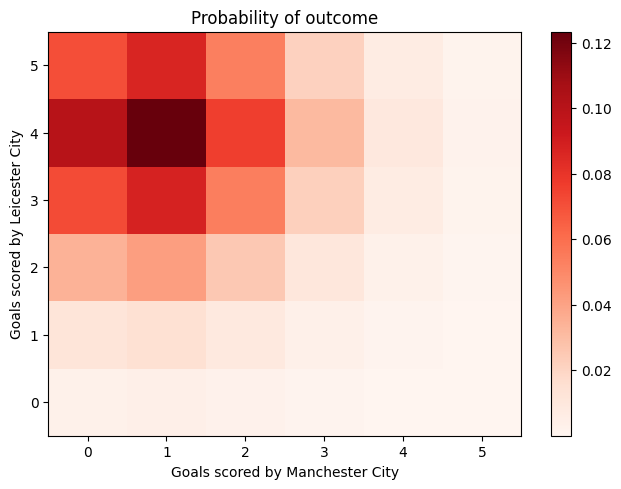

In [84]:
# Code to caluclate the goals for the match.
def simulate_match(foot_model, homeTeam, awayTeam, max_goals=10):
    home_goals_avg = foot_model.predict(pd.DataFrame(data={'team': homeTeam,
                                                           'opponent': awayTeam, 'home': 1},
                                                     index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={'team': awayTeam,
                                                           'opponent': homeTeam, 'home': 0},
                                                     index=[1])).values[0]
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals + 1)] for team_avg in
                 [home_goals_avg, away_goals_avg]]
    return (np.outer(np.array(team_pred[0]), np.array(team_pred[1])))

#Fill in the matrix
max_goals=5
score_matrix=simulate_match(poisson_model, home_team, away_team,max_goals)

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
pos=ax.imshow(score_matrix, extent=[-0.5,max_goals+0.5,-0.5,max_goals+0.5], aspect='auto',cmap=plt.cm.Reds)
fig.colorbar(pos, ax=ax)
ax.set_title('Probability of outcome')
plt.xlim((-0.5,5.5))
plt.ylim((-0.5,5.5))
plt.tight_layout()
ax.set_xlabel('Goals scored by ' + away_team)
ax.set_ylabel('Goals scored by ' + home_team)
plt.show()

#Home, draw, away probabilities
homewin=np.sum(np.tril(score_matrix, -1))
draw=np.sum(np.diag(score_matrix))
awaywin=np.sum(np.triu(score_matrix, 1))

In [91]:
# Simule a partida entre o 1º e o 4º colocado, onde o 1º joga em casa.
# Primeiro, apresente a quantidade esperada de gols de cada time.
# Em seguida, apresente um grid com as probabilidades associadas a cada placar possível.

# Set teams here
home_team='Leicester City'
away_team='Tottenham Hotspur'

#Predict for Arsenal vs. Manchester City
home_score_rate=poisson_model.predict(pd.DataFrame(data={'team': home_team, 'opponent': away_team,
                                       'home':1},index=[1]))
away_score_rate=poisson_model.predict(pd.DataFrame(data={'team': away_team, 'opponent': home_team,
                                       'home':0},index=[1]))
print(home_team + ' against ' + away_team + ' expect to score: ' + str(home_score_rate))
print(away_team + ' against ' + home_team + ' expect to score: ' + str(away_score_rate))

#Lets just get a result
home_goals=np.random.poisson(home_score_rate)
away_goals=np.random.poisson(away_score_rate)
print(home_team + ': ' + str(home_goals[0]))
print(away_team + ': '  + str(away_goals[0]))



Leicester City against Tottenham Hotspur expect to score: 1    1.070419
dtype: float64
Tottenham Hotspur against Leicester City expect to score: 1    1.199697
dtype: float64
Leicester City: 1
Tottenham Hotspur: 1


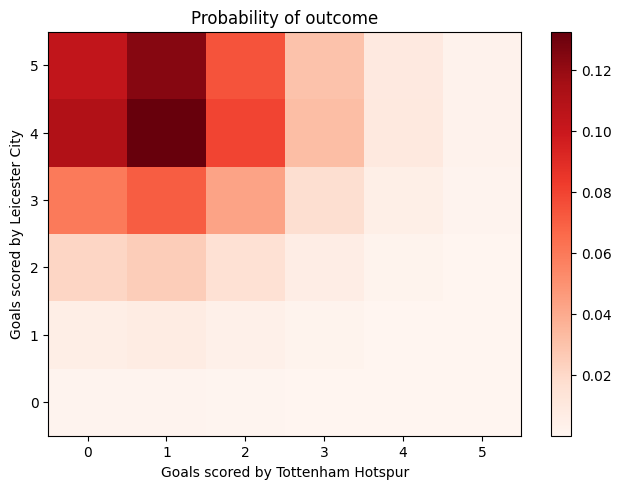

In [93]:
# Code to caluclate the goals for the match.

homeTeam = home_team
awayTeam = away_team
def simulate_match(foot_model, homeTeam, awayTeam, max_goals=10):
    home_goals_avg = foot_model.predict(pd.DataFrame(data={'team': homeTeam,
                                                           'opponent': awayTeam, 'home': 1},
                                                     index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={'team': awayTeam,
                                                           'opponent': homeTeam, 'home': 0},
                                                     index=[1])).values[0]
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals + 1)] for team_avg in
                 [home_goals_avg, away_goals_avg]]
    return (np.outer(np.array(team_pred[0]), np.array(team_pred[1])))

#Fill in the matrix
max_goals=5
score_matrix=simulate_match(poisson_model, home_team, away_team,max_goals)

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
pos=ax.imshow(score_matrix, extent=[-0.5,max_goals+0.5,-0.5,max_goals+0.5], aspect='auto',cmap=plt.cm.Reds)
fig.colorbar(pos, ax=ax)
ax.set_title('Probability of outcome')
plt.xlim((-0.5,5.5))
plt.ylim((-0.5,5.5))
plt.tight_layout()
ax.set_xlabel('Goals scored by ' + away_team)
ax.set_ylabel('Goals scored by ' + home_team)
plt.show()

#Home, draw, away probabilities
homewin=np.sum(np.tril(score_matrix, -1))
draw=np.sum(np.diag(score_matrix))
awaywin=np.sum(np.triu(score_matrix, 1))

## Questão 5
- Utilize o modelo treinado para simular os placares de todos os jogos da temporada.
- Construa uma tabela de classificação em cima dos resultados esperados. Considere que jogos com uma diferença esperada de gols < 0.5 são empates.
- Compare a tabela real com a simulada. Onde estão as principais diferenças entre elas? E similaridades? Como você interpreta essa comparação? É possível identificar aspectos que o modelo subestima/superestima? É possível identificar times que tiveram campanhas "sortudas" ou "azaradas"?

In [86]:
import pandas as pd

# Criando a tabela final simulada
tabela_simulada = pd.DataFrame(columns=["PTS", "J", "V", "E", "D", "GP", "GC", "SG"])
tabela_simulada.index.name = "Team"

# Função para atualizar a tabela final
def atualizar_tabela(tabela, time, pontos, gols_pro, gols_contra, resultado):
    if time not in tabela.index:
        tabela.loc[time] = [0, 0, 0, 0, 0, 0, 0, 0]  # Inicializa o time

    # Atualiza estatísticas
    tabela.at[time, "J"] += 1  # Jogos
    tabela.at[time, "PTS"] += pontos  # Pontos
    tabela.at[time, "GP"] += gols_pro  # Gols Pró
    tabela.at[time, "GC"] += gols_contra  # Gols Contra
    tabela.at[time, "SG"] = tabela.at[time, "GP"] - tabela.at[time, "GC"]  # Saldo de Gols

    if resultado == "V":
        tabela.at[time, "V"] += 1
    elif resultado == "E":
        tabela.at[time, "E"] += 1
    elif resultado == "D":
        tabela.at[time, "D"] += 1

# Processando cada jogo
for _, row in df.iterrows():
    # Extraindo times
    home_team, away_team = row["HT"], row["AT"]

    # Calculando expectativas de gols com o modelo de Poisson
    home_score_rate = poisson_model.predict(pd.DataFrame({
        'team': [home_team], 'opponent': [away_team], 'home': [1]
    })).iloc[0]

    away_score_rate = poisson_model.predict(pd.DataFrame({
        'team': [away_team], 'opponent': [home_team], 'home': [0]
    })).iloc[0]

    print(f"{home_team} contra {away_team}: Esperado {home_score_rate:.2f} x {away_score_rate:.2f}")

    # Determinar pontos e resultado
    if abs(home_score_rate - away_score_rate) < 0.5:  # Empate
        resultado_casa, resultado_fora = "E", "E"
        pontos_casa, pontos_fora = 1, 1
    elif home_score_rate > away_score_rate:
        resultado_casa, resultado_fora = "V", "D"
        pontos_casa, pontos_fora = 3, 0
    else:
        resultado_casa, resultado_fora = "D", "V"
        pontos_casa, pontos_fora = 0, 3

    # Atualizar tabela para os dois times
    atualizar_tabela(tabela_simulada, home_team, pontos_casa, home_score_rate, away_score_rate, resultado_casa)
    atualizar_tabela(tabela_simulada, away_team, pontos_fora, away_score_rate, home_score_rate, resultado_fora)

# Resetando o índice para exibição
tabela_simulada = tabela_simulada.sort_values(by=["PTS", "SG", "GP"], ascending=[False, False, False])

# Exibir tabela final
print(tabela_simulada)

Bournemouth contra Aston Villa: Esperado 1.88 x 0.81
Chelsea contra Swansea City: Esperado 1.65 x 0.98
Everton contra Watford: Esperado 1.49 x 0.95
Leicester City contra Sunderland: Esperado 2.42 x 0.81
Manchester United contra Tottenham Hotspur: Esperado 0.76 x 1.13
Norwich City contra Crystal Palace: Esperado 1.08 x 1.29
Arsenal contra West Ham United: Esperado 1.79 x 1.14
Newcastle United contra Southampton: Esperado 0.92 x 1.67
Stoke City contra Liverpool: Esperado 1.23 x 1.52
West Bromwich Albion contra Manchester City: Esperado 0.78 x 1.58


<ipython-input-86-6d948619cf5c>:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.884086842318829' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  tabela.at[time, "GP"] += gols_pro  # Gols Pró
<ipython-input-86-6d948619cf5c>:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.8098611024950713' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  tabela.at[time, "GC"] += gols_contra  # Gols Contra
<ipython-input-86-6d948619cf5c>:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.0742257398237578' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  tabela.at[time, "SG"] = tabela.at[time, "GP"] - tabela.at[time, "GC"]  # Saldo de

Aston Villa contra Manchester United: Esperado 0.52 x 1.57
Southampton contra Everton: Esperado 1.47 x 1.19
Sunderland contra Norwich City: Esperado 1.74 x 1.25
Swansea City contra Newcastle United: Esperado 1.50 x 1.02
Tottenham Hotspur contra Stoke City: Esperado 1.93 x 0.60
Watford contra West Bromwich Albion: Esperado 1.01 x 0.71
West Ham United contra Leicester City: Esperado 1.26 x 1.47
Crystal Palace contra Arsenal: Esperado 0.88 x 1.55
Manchester City contra Chelsea: Esperado 2.12 x 1.06
Liverpool contra Bournemouth: Esperado 2.28 x 1.16
Crystal Palace contra Aston Villa: Esperado 1.60 x 0.61
Leicester City contra Tottenham Hotspur: Esperado 1.07 x 1.20
Manchester United contra Newcastle United: Esperado 1.83 x 0.68
Norwich City contra Stoke City: Esperado 1.12 x 1.37
Sunderland contra Swansea City: Esperado 1.34 x 1.20
West Ham United contra Bournemouth: Esperado 2.18 x 1.07
Everton contra Manchester City: Esperado 1.38 x 1.75
Watford contra Southampton: Esperado 0.84 x 1.00
W

In [87]:
import pandas as pd

# Criando a tabela final simulada
tabela_simulada = pd.DataFrame(columns=["PTS", "J", "V", "E", "D", "GP", "GC", "SG"])
tabela_simulada.index.name = "Team"

# Função para atualizar a tabela final
def atualizar_tabela(tabela, time, pontos, gols_pro, gols_contra, resultado):
    if time not in tabela.index:
        tabela.loc[time] = [0, 0, 0, 0, 0, 0, 0, 0]  # Inicializa o time

    # Atualiza estatísticas
    tabela.at[time, "J"] += 1  # Jogos
    tabela.at[time, "PTS"] += pontos  # Pontos
    tabela.at[time, "GP"] += gols_pro  # Gols Pró
    tabela.at[time, "GC"] += gols_contra  # Gols Contra
    tabela.at[time, "SG"] = tabela.at[time, "GP"] - tabela.at[time, "GC"]  # Saldo de Gols

    if resultado == "V":
        tabela.at[time, "V"] += 1
    elif resultado == "E":
        tabela.at[time, "E"] += 1
    elif resultado == "D":
        tabela.at[time, "D"] += 1

# Processando cada jogo
for _, row in df.iterrows():
    # Ajuste para os nomes corretos das colunas
    home_team, away_team = row["HT"], row["AT"]  # Supondo que HT = home team e AT = away team

    # Calculando expectativas de gols com o modelo de Poisson
    home_score_rate = poisson_model.predict(pd.DataFrame({
        'team': [home_team], 'opponent': [away_team], 'home': [1]
    })).iloc[0]

    away_score_rate = poisson_model.predict(pd.DataFrame({
        'team': [away_team], 'opponent': [home_team], 'home': [0]
    })).iloc[0]

    print(f"{home_team} contra {away_team}: Esperado {home_score_rate:.2f} x {away_score_rate:.2f}")

    # Determinar pontos e resultado
    if abs(home_score_rate - away_score_rate) < 0.5:  # Empate
        resultado_casa, resultado_fora = "E", "E"
        pontos_casa, pontos_fora = 1, 1
    elif home_score_rate > away_score_rate:
        resultado_casa, resultado_fora = "V", "D"
        pontos_casa, pontos_fora = 3, 0
    else:
        resultado_casa, resultado_fora = "D", "V"
        pontos_casa, pontos_fora = 0, 3

    # Atualizar tabela para os dois times
    atualizar_tabela(tabela_simulada, home_team, pontos_casa, home_score_rate, away_score_rate, resultado_casa)
    atualizar_tabela(tabela_simulada, away_team, pontos_fora, away_score_rate, home_score_rate, resultado_fora)

# Resetando o índice e ordenando a tabela final
tabela_simulada = tabela_simulada.sort_values(by=["PTS", "SG", "GP"], ascending=[False, False, False])

# Exibir tabela final
print(tabela_simulada)

Bournemouth contra Aston Villa: Esperado 1.88 x 0.81
Chelsea contra Swansea City: Esperado 1.65 x 0.98
Everton contra Watford: Esperado 1.49 x 0.95
Leicester City contra Sunderland: Esperado 2.42 x 0.81
Manchester United contra Tottenham Hotspur: Esperado 0.76 x 1.13
Norwich City contra Crystal Palace: Esperado 1.08 x 1.29
Arsenal contra West Ham United: Esperado 1.79 x 1.14
Newcastle United contra Southampton: Esperado 0.92 x 1.67
Stoke City contra Liverpool: Esperado 1.23 x 1.52
West Bromwich Albion contra Manchester City: Esperado 0.78 x 1.58
Aston Villa contra Manchester United: Esperado 0.52 x 1.57
Southampton contra Everton: Esperado 1.47 x 1.19
Sunderland contra Norwich City: Esperado 1.74 x 1.25
Swansea City contra Newcastle United: Esperado 1.50 x 1.02
Tottenham Hotspur contra Stoke City: Esperado 1.93 x 0.60
Watford contra West Bromwich Albion: Esperado 1.01 x 0.71
West Ham United contra Leicester City: Esperado 1.26 x 1.47
Crystal Palace contra Arsenal: Esperado 0.88 x 1.55


<ipython-input-87-a4428279c434>:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.884086842318829' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  tabela.at[time, "GP"] += gols_pro  # Gols Pró
<ipython-input-87-a4428279c434>:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.8098611024950713' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  tabela.at[time, "GC"] += gols_contra  # Gols Contra
<ipython-input-87-a4428279c434>:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.0742257398237578' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  tabela.at[time, "SG"] = tabela.at[time, "GP"] - tabela.at[time, "GC"]  # Saldo de

Crystal Palace contra Aston Villa: Esperado 1.60 x 0.61
Leicester City contra Tottenham Hotspur: Esperado 1.07 x 1.20
Manchester United contra Newcastle United: Esperado 1.83 x 0.68
Norwich City contra Stoke City: Esperado 1.12 x 1.37
Sunderland contra Swansea City: Esperado 1.34 x 1.20
West Ham United contra Bournemouth: Esperado 2.18 x 1.07
Everton contra Manchester City: Esperado 1.38 x 1.75
Watford contra Southampton: Esperado 0.84 x 1.00
West Bromwich Albion contra Chelsea: Esperado 1.08 x 1.28
Arsenal contra Liverpool: Esperado 1.94 x 1.19
Aston Villa contra Sunderland: Esperado 0.99 x 1.56
Bournemouth contra Leicester City: Esperado 0.98 x 1.99
Chelsea contra Crystal Palace: Esperado 1.55 x 1.03
Liverpool contra West Ham United: Esperado 1.69 x 1.49
Manchester City contra Watford: Esperado 1.65 x 0.71
Newcastle United contra Arsenal: Esperado 0.91 x 2.26
Stoke City contra West Bromwich Albion: Esperado 1.13 x 0.85
Tottenham Hotspur contra Everton: Esperado 2.01 x 0.88
Southampto